In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential,Model
from keras.layers import Dense,convolutional,Input,Conv2D,BatchNormalization,Activation,UpSampling2D,Dropout
from keras.layers.merge import concatenate,Add
from keras import models, layers
import numpy as np
############dataset
from PIL import Image
import os
import sys
import h5py
import tables
from keras.layers.advanced_activations import LeakyReLU
from keras.regularizers import l2

Using TensorFlow backend.


In [ ]:
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


KeyboardInterrupt: ignored

In [ ]:
%tensorflow_version 2.x

In [ ]:
xtrain_path = "x_train/"
xtrain_dirs = os.listdir( xtrain_path )
xtest_path = "x_test/"
xtest_dirs = os.listdir( xtest_path )
x_train = []
x_test=[]
ytrain_path = "y_train/"
ytrain_dirs = os.listdir( ytrain_path )
ytest_path = "y_test/"
ytest_dirs = os.listdir( ytest_path )
y_train = []
y_test=[]

In [ ]:
i=1
for file in xtrain_dirs:
    print(i)

    img = Image.open('x_train/'+file)
    img = img.resize((320, 320))

    arr = np.array(img)
    x_train=np.append(x_train,arr)

    x_train = np.array(x_train, dtype='float32')
    x_train = x_train.reshape((i, 320, 320, 3))
    
    #x_train /= 255

    i += 1


print(x_train.shape)

In [ ]:
j = 1
for file in xtest_dirs:
    print(j)

    img = Image.open('x_test/'+file)
    img = img.resize((320, 320))

    arr = np.array(img)
    x_test=np.append(x_test,arr)

    x_test = np.array(x_test, dtype='float32')
    x_test = x_test.reshape((j, 320, 320, 3))

    #x_test /= 255

    j += 1


In [ ]:






j = 1
for file in ytest_dirs:
    print(j)

    img = Image.open('y_test/'+file)
    img = img.resize((320, 320))

    arr = np.array(img)
    y_test=np.append(y_test,arr)

    y_test = np.array(y_test, dtype='float32')
    y_test = y_test.reshape((j, 320, 320, 1))

  

    j += 1



In [ ]:
i = 1
for file in ytrain_dirs:
    print(i)

    img = Image.open('y_train/' + file)
    img = img.resize((320, 320))

    arr = np.array(img)
    y_train = np.append(y_train, arr)

    y_train = np.array(y_train, dtype='float32')
    y_train = y_train.reshape((i, 320, 320, 1))

    y_train /= 255

    i += 1
print(y_train.shape)

In [ ]:
hf = h5py.File('Approach2_data.h5', 'w')
hf.create_dataset('x_train', data=x_train)
hf.create_dataset('y_train', data=y_train)
hf.create_dataset('x_test', data=x_test)
hf.create_dataset('y_test', data=y_test)
hf.close()

In [ ]:
hdf5_file = tables.open_file('drive/My Drive/x_train_160.h5', mode='r')
x_train1 = np.array(hdf5_file.root.x_train1)
hdf5_file.close()
print(x_train1.shape)

(716, 160, 160, 3)


In [ ]:
hdf5_file = tables.open_file('drive/My Drive/x_train2_modify1.h5', mode='r')
x_train21 = np.array(hdf5_file.root.x_train2_modify1)
hdf5_file.close()
print(x_train21.shape)

(1195, 160, 160, 3)


In [ ]:
hdf5_file = tables.open_file('drive/My Drive/x_train2_modify2.h5', mode='r')
x_train22 = np.array(hdf5_file.root.x_train2_modify2)
hdf5_file.close()
print(x_train22.shape)

(1300, 160, 160, 3)


In [ ]:
hdf5_file = tables.open_file('drive/My Drive/x_train2_modify3.h5', mode='r')
x_train23 = np.array(hdf5_file.root.x_train2_modify3)
hdf5_file.close()
print(x_train23.shape)

(1300, 160, 160, 3)


In [ ]:
hdf5_file = tables.open_file('drive/My Drive/x_train1_160_flip.h5', mode='r')
x_train_flip = np.array(hdf5_file.root.x_train1_flip)
hdf5_file.close()
print(x_train_flip.shape)

(716, 160, 160, 3)


In [ ]:
import numpy as np

x_train=np.concatenate((x_train21,x_train22,x_train23),axis=0)
#x_train=np.concatenate((x_train1,x_train_flip),axis=0)
print(x_train.shape)

(3795, 160, 160, 3)


In [ ]:
hdf5_file = tables.open_file('drive/My Drive/y_train1_160.h5', mode='r')
y_train1 = np.array(hdf5_file.root.y_train1)
hdf5_file.close()
print(y_train1.shape)

(716, 160, 160, 1)


In [ ]:
hdf5_file = tables.open_file('drive/My Drive/y_train1_160_flip.h5', mode='r')
y_train_flip = np.array(hdf5_file.root.y_train1_flip)
hdf5_file.close()
print(y_train_flip.shape)

(716, 160, 160, 1)


In [ ]:
hdf5_file = tables.open_file('drive/My Drive/y_train2_modify1.h5', mode='r')
y_train21 = np.array(hdf5_file.root.y_train2_modify1)
hdf5_file.close()
print(y_train21.shape)

(1195, 160, 160, 1)


In [ ]:
hdf5_file = tables.open_file('drive/My Drive/y_train2_modify2.h5', mode='r')
y_train22 = np.array(hdf5_file.root.y_train2_modify2)
hdf5_file.close()
print(y_train22.shape)

(1300, 160, 160, 1)


In [ ]:
hdf5_file = tables.open_file('drive/My Drive/y_train2_modify3.h5', mode='r')
y_train23 = np.array(hdf5_file.root.y_train2_modify3)
hdf5_file.close()
print(y_train23.shape)

(1300, 160, 160, 1)


In [ ]:
y_train21=y_train21/255
y_train21=1-y_train21
y_train22=y_train22/255
y_train22=1-y_train22
y_train23=y_train23/255
y_train23=1-y_train23

In [ ]:
y_train=np.concatenate((y_train21,y_train22,y_train23),axis=0)
#y_train=np.concatenate((y_train1,y_train_flip),axis=0)
print(y_train.shape)

(3795, 160, 160, 1)


In [ ]:
np.max(y_train)

1.0

In [ ]:
hdf5_file = tables.open_file('drive/My Drive/x_test1_160.h5', mode='r')
x_test1 = np.array(hdf5_file.root.x_test1)
hdf5_file.close()
print(x_test1.shape)

(183, 160, 160, 3)


In [ ]:
hdf5_file = tables.open_file('drive/My Drive/x_test2_160.h5', mode='r')
x_test2 = np.array(hdf5_file.root.x_test)
hdf5_file.close()
print(x_test2.shape)

(450, 160, 160, 3)


In [ ]:
x_test=np.concatenate((x_test1,x_test2),axis=0)
print(x_test.shape)

(633, 160, 160, 3)


In [ ]:
hdf5_file = tables.open_file('drive/My Drive/y_test1_160.h5', mode='r')
y_test1 = np.array(hdf5_file.root.y_test1)
hdf5_file.close()
print(y_test1.shape)

(183, 160, 160, 1)


In [ ]:
hdf5_file = tables.open_file('drive/My Drive/y_test2_160.h5', mode='r')
y_test2 = np.array(hdf5_file.root.y_test)
hdf5_file.close()
print(y_test2.shape)

(450, 160, 160, 1)


In [ ]:
y_test2=y_test2/255
y_test2=1-y_test2

In [ ]:
y_test=np.concatenate((y_test1,y_test2),axis=0)
print(y_test.shape)

(633, 160, 160, 1)


In [ ]:
x_test=x_test2

NameError: ignored

In [ ]:
y_test=y_test2

NameError: ignored

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(3795, 160, 160, 3)
(183, 160, 160, 3)
(3795, 160, 160, 1)
(183, 160, 160, 1)


In [ ]:
hdf5_file = tables.open_file('drive/My Drive/xtrain_withface.h5', mode='r')
x_train2 = np.array(hdf5_file.root.xtrain_withface)
hdf5_file.close()
print(x_train2.shape)

(952, 160, 160, 3)


In [ ]:
hdf5_file = tables.open_file('drive/My Drive/x_train_small.h5', mode='r')
x_train1 = np.array(hdf5_file.root.x_train_small)
hdf5_file.close()
print(x_train1.shape)

(287, 160, 160, 3)


In [ ]:
import numpy as np

#x_train=np.concatenate((x_train21,x_train22,x_train23),axis=0)
x_train=np.concatenate((x_train1,x_train),axis=0)
print(x_train.shape)

(1239, 160, 160, 3)


In [ ]:
hdf5_file = tables.open_file('drive/My Drive/ytrain_withface.h5', mode='r')
y_train2 = np.array(hdf5_file.root.ytrain_withface)
hdf5_file.close()
print(y_train2.shape)
y_train2=y_train2/255
y_train2=1-y_train2

(952, 160, 160, 1)


In [ ]:
hdf5_file = tables.open_file('drive/My Drive/y_train_small.h5', mode='r')
y_train1 = np.array(hdf5_file.root.y_train_small)
hdf5_file.close()
print(y_train1.shape)

(287, 160, 160, 1)


In [ ]:
hdf5_file = tables.open_file('drive/My Drive/xtest_withface.h5', mode='r')
x_test = np.array(hdf5_file.root.xtest_withface)
hdf5_file.close()
print(x_test.shape)

(100, 160, 160, 3)


In [ ]:
x_test=x_test/255

In [ ]:
hdf5_file = tables.open_file('drive/My Drive/ytest_withface.h5', mode='r')
y_test = np.array(hdf5_file.root.ytest_withface)
hdf5_file.close()
print(y_test.shape)

(100, 160, 160, 1)


In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
y_test=y_test/255
y_test=1-y_test
y_train=y_train/255
y_train=1-y_train

In [ ]:
import numpy as np

#
y_train=np.concatenate((y_train1,y_train),axis=0)
print(y_train.shape)

(1239, 160, 160, 1)


In [ ]:
x_test=x_test/255

In [ ]:
hdf5_file = tables.open_file('drive/My Drive/y_train2_withface2.h5', mode='r')
y_train = np.array(hdf5_file.root.y_train2_withface2)
hdf5_file.close()
print(y_train.shape)

(2856, 160, 160, 1)


In [ ]:
hdf5_file = tables.open_file('drive/My Drive/xtrain_withblur1.h5', mode='r')
x_train = np.array(hdf5_file.root.xtrain_withblur1)
hdf5_file.close()
print(x_train.shape)

(1798, 160, 160, 3)


In [ ]:
hdf5_file = tables.open_file('drive/My Drive/ytrain_withblur1.h5', mode='r')
y_train = np.array(hdf5_file.root.ytrain_withblur1)
hdf5_file.close()
print(y_train.shape)

(1798, 160, 160, 1)


In [ ]:
hdf5_file = tables.open_file('drive/My Drive/homemade_origin3_1.h5', mode='r')
x_train3 = np.array(hdf5_file.root.homemade_origin3_1)
hdf5_file.close()
print(x_train3.shape)

(40, 160, 160, 3)


In [ ]:
hdf5_file = tables.open_file('drive/My Drive/homemade_origin3_2.h5', mode='r')
x_train4 = np.array(hdf5_file.root.homemade_origin3_2)
hdf5_file.close()
print(x_train4.shape)

(220, 160, 160, 3)


In [ ]:
x_train1=x_train1/255

In [ ]:
np.max(x_train1)

1.0

In [ ]:
hdf5_file = tables.open_file('drive/My Drive/homemade_mask_hand1.h5', mode='r')
y_train1 = np.array(hdf5_file.root.homemade_mask_hand1)
hdf5_file.close()
print(y_train1.shape)

(258, 160, 160, 1)


In [ ]:
hdf5_file = tables.open_file('drive/My Drive/homemade_mask_hand2.h5', mode='r')
y_train2 = np.array(hdf5_file.root.homemade_mask_hand2)
hdf5_file.close()
print(y_train2.shape)

(100, 160, 160, 1)


In [ ]:
np.max(x_train3)

1.0

In [ ]:
y_train1=y_train1/255
#x_train2=x_train2/255

In [ ]:
hdf5_file = tables.open_file('drive/My Drive/homemade_origin3.h5', mode='r')
x_train1 = np.array(hdf5_file.root.homemade_origin3)
hdf5_file.close()
print(x_train1.shape)

(258, 160, 160, 3)


In [ ]:
hdf5_file = tables.open_file('drive/My Drive/homemade_origin4.h5', mode='r')
x_train2 = np.array(hdf5_file.root.homemade_origin4)
hdf5_file.close()
print(x_train2.shape)

(100, 160, 160, 3)


In [ ]:
import numpy as np

#
x_train5=np.concatenate((x_train5_1,x_train5_2),axis=0)
print(x_train5.shape)

(298, 160, 160, 3)


In [ ]:
x_train=np.concatenate((x_train1,x_train2,x_train3,x_train4),axis=0)
print(x_train.shape)

(618, 160, 160, 3)


In [ ]:
y_train=np.concatenate((y_train1,y_train2,y_train3),axis=0)
print(y_train.shape)

(618, 160, 160, 1)


In [ ]:
print(y_train3.shape)

(154, 160, 160, 1)


In [ ]:
hdf5_file = tables.open_file('drive/My Drive/homemade_mask_hand3.h5', mode='r')
y_train3 = np.array(hdf5_file.root.homemade_mask_hand3)
hdf5_file.close()
print(y_train3.shape)

(260, 160, 160, 1)


In [ ]:
y_train=np.concatenate((y_train3,y_train4),axis=0)
print(y_train.shape)

NameError: ignored

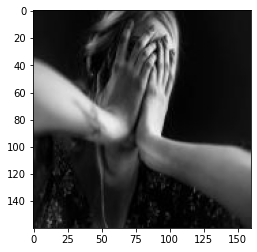

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[-1])
plt.show()


In [ ]:
from skimage.color import rgb2gray
x_test = rgb2gray(x_test)
x_train = rgb2gray(x_train)





In [ ]:
x_test = rgb2gray(x_test)

In [ ]:
hdf5_file = tables.open_file('drive/My Drive/homemade_mask_test.h5', mode='r')
y_test = np.array(hdf5_file.root.homemade_mask_test)
hdf5_file.close()
print(y_test.shape)

(38, 160, 160, 1)


In [ ]:
hdf5_file = tables.open_file('drive/My Drive/homemade_origin_test.h5', mode='r')
x_test = np.array(hdf5_file.root.homemade_origin_test)
hdf5_file.close()
print(x_test.shape)

(38, 160, 160, 3)


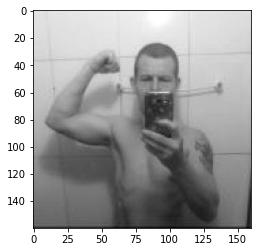

In [ ]:
plt.imshow(x_test[-1],cmap="gray")
plt.show()


In [ ]:
x_train=x_train.reshape(618,160,160,1)
x_test=x_test.reshape(38, 160, 160, 1)

In [ ]:
x_test=x_test.reshape(38, 160, 160, 1)

In [ ]:
print(x_train.shape,x_test.shape)

(618, 160, 160, 1) (38, 160, 160, 1)


In [ ]:
np.max(y_test)

1.0

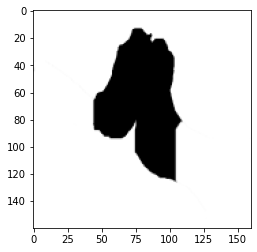

In [ ]:
test=y_train[-1]
test=test.reshape(160,160)
plt.imshow(test,cmap="gray")
plt.show()

In [ ]:
np.max(x_train)

0.99999994

In [ ]:

LR = LeakyReLU(alpha=0.1)
LR.__name__ = 'leakyRelu'
#input=Input(shape=(320, 320,3))
input=Input(shape=(320, 320,1))
layer1=Conv2D(16, (3, 3),padding='same')(input)
##group 1
def Residual_group1_unit(input):
    ResG_1U = input
    ResG_1U=BatchNormalization()(input)
    ResG_1U=Activation("relu")(ResG_1U)
    ResG_1U=Conv2D(32, (1, 1),padding='same')(ResG_1U)
    ResG_1U=BatchNormalization()(ResG_1U)
    ResG_1U=Activation("relu")(ResG_1U)
    ResG_1U=Conv2D(32, (3, 3),padding='same')(ResG_1U)
    ResG_1U=BatchNormalization()(ResG_1U)
    ResG_1U = Activation("relu")(ResG_1U)
    #ResG_1U = LR(ResG_1U)
    ResG_1U=Conv2D(32, (1, 1),padding='same')(ResG_1U)
    ResG_1U=Add()([input,ResG_1U])
    return  ResG_1U
ResG_1U_1=Conv2D(32, (1, 1))(layer1)
ResG_1U_1 = Activation("relu")(ResG_1U_1)
#ResG_1U_1=BatchNormalization()(ResG_1U_1)
ResG_1U_1=Residual_group1_unit(ResG_1U_1)

#ResG_1U_1=BatchNormalization()(ResG_1U_1)
ResG_1U_2=Residual_group1_unit(ResG_1U_1)
ResG_1U_3=Residual_group1_unit(ResG_1U_2)

ResG_2U_1=Conv2D(64, (1, 1),strides=2)(ResG_1U_3)
def Residual_group2_unit(input):
    ResG_2U=input
    ResG_2U=BatchNormalization()(input)
    ResG_2U=Activation("relu")(ResG_2U)
    ResG_2U=Conv2D(64, (1, 1),padding='same')(ResG_2U)
    ResG_2U=BatchNormalization()(ResG_2U)
    ResG_2U=Activation("relu")(ResG_2U)
    ResG_2U=Conv2D(64, (3, 3),padding='same')(ResG_2U)
    ResG_2U=BatchNormalization()(ResG_2U)
    #ResG_2U = LR(ResG_2U)
    ResG_2U = Activation("relu")(ResG_2U)
    ResG_2U=Conv2D(64, (1, 1),padding='same')(ResG_2U)
    ResG_2U=Add()([input,ResG_2U])
    return  ResG_2U
#ResG_2U_1=BatchNormalization()(ResG_2U_1)
ResG_2U_1=Residual_group2_unit(ResG_2U_1)
ResG_2U_2=Residual_group2_unit(ResG_2U_1)
ResG_2U_3=Residual_group2_unit(ResG_2U_2)

ResG_3U_1=Conv2D(128, (1, 1),strides=2)(ResG_2U_3)
def Residual_group3_unit(input):
    ResG_3U=input
    ResG_3U=BatchNormalization()(input)
    ResG_3U=Activation("relu")(ResG_3U)
    ResG_3U=Conv2D(128, (1, 1),padding='same')(ResG_3U)
    ResG_3U=BatchNormalization()(ResG_3U)
    ResG_3U=Activation("relu")(ResG_3U)
    ResG_3U=Conv2D(128, (3, 3),padding='same')(ResG_3U)
    ResG_3U=BatchNormalization()(ResG_3U)
    #ResG_3U = LR(ResG_3U)
    ResG_3U = Activation("relu")(ResG_3U)
    ResG_3U=Conv2D(128, (1, 1),padding='same')(ResG_3U)
    ResG_3U=Add()([input,ResG_3U])
    return  ResG_3U

##load all layers into model
#ResG_3U_1=BatchNormalization()(ResG_3U_1)
ResG_3U_1=Residual_group3_unit(ResG_3U_1)
ResG_3U_2=Residual_group3_unit(ResG_3U_1)
ResG_3U_3=Residual_group3_unit(ResG_3U_2)

Aspp1=Conv2D(32,(1,1),dilation_rate=1,activation='relu')(ResG_3U_3)
Aspp2=Conv2D(32,(3,3),dilation_rate=3,padding='same',activation='relu')(ResG_3U_3)
Aspp3=Conv2D(32,(3,3),dilation_rate=6,padding='same',activation='relu')(ResG_3U_3)
Aspp4=Conv2D(32,(3,3),dilation_rate=12,padding='same',activation='relu')(ResG_3U_3)
Aspp5=Conv2D(32,(3,3),dilation_rate=18,padding='same',activation='relu')(ResG_3U_3)

Aspp=concatenate([Aspp1,Aspp2,Aspp3,Aspp4,Aspp5],axis=-1)

drop_out_Aspp=Dropout(0.2)(Aspp)

output_before_Upsample=Conv2D(1,(1,1),padding='same',activation='sigmoid')(drop_out_Aspp)
#upsampling
#output=output_before_Upsample
output=UpSampling2D((4,4),interpolation='bilinear')(output_before_Upsample)

model=Model(inputs=input,outputs=output)
model.summary()

In [ ]:
################input size 160*160*1

input=Input(shape=(160, 160,1))
layer1=Conv2D(16, (3, 3),padding='same')(input)
##group 1
def Residual_group1_unit(input):
    ResG_1U = input
    ResG_1U=BatchNormalization()(input)
    ResG_1U=Activation("relu")(ResG_1U)
    ResG_1U=Conv2D(32, (1, 1),padding='same')(ResG_1U)
    ResG_1U=BatchNormalization()(ResG_1U)
    ResG_1U=Activation("relu")(ResG_1U)
    ResG_1U=Conv2D(64, (3, 3),padding='same')(ResG_1U)
    ResG_1U=BatchNormalization()(ResG_1U)
    ResG_1U = Activation("relu")(ResG_1U)
    #ResG_1U = LR(ResG_1U)
    ResG_1U=Conv2D(32, (1, 1),padding='same')(ResG_1U)
    ResG_1U=Add()([input,ResG_1U])
    return  ResG_1U
ResG_1U_1=Conv2D(32, (1, 1))(layer1)
ResG_1U_1 = Activation("relu")(ResG_1U_1)
#ResG_1U_1=BatchNormalization()(ResG_1U_1)
ResG_1U_1=Residual_group1_unit(ResG_1U_1)

#ResG_1U_1=BatchNormalization()(ResG_1U_1)
ResG_1U_2=Residual_group1_unit(ResG_1U_1)
ResG_1U_3=Residual_group1_unit(ResG_1U_2)

ResG_2U_1=Conv2D(64, (1, 1),strides=2)(ResG_1U_3)
def Residual_group2_unit(input):
    ResG_2U=input
    ResG_2U=BatchNormalization()(input)
    ResG_2U=Activation("relu")(ResG_2U)
    ResG_2U=Conv2D(64, (1, 1),padding='same')(ResG_2U)
    ResG_2U=BatchNormalization()(ResG_2U)
    ResG_2U=Activation("relu")(ResG_2U)
    ResG_2U=Conv2D(128, (3, 3),padding='same')(ResG_2U)
    ResG_2U=BatchNormalization()(ResG_2U)
    #ResG_2U = LR(ResG_2U)
    ResG_2U = Activation("relu")(ResG_2U)
    ResG_2U=Conv2D(64, (1, 1),padding='same')(ResG_2U)
    ResG_2U=Add()([input,ResG_2U])
    return  ResG_2U
#ResG_2U_1=BatchNormalization()(ResG_2U_1)
ResG_2U_1=Residual_group2_unit(ResG_2U_1)
ResG_2U_2=Residual_group2_unit(ResG_2U_1)
ResG_2U_3=Residual_group2_unit(ResG_2U_2)

ResG_3U_1=Conv2D(128, (1, 1),strides=2)(ResG_2U_3)
def Residual_group3_unit(input):
    ResG_3U=input
    ResG_3U=BatchNormalization()(input)
    ResG_3U=Activation("relu")(ResG_3U)
    ResG_3U=Conv2D(128, (1, 1),padding='same')(ResG_3U)
    ResG_3U=BatchNormalization()(ResG_3U)
    ResG_3U=Activation("relu")(ResG_3U)

    #ResG_3U=Dropout(0.4)(ResG_3U)

    ResG_3U=Conv2D(256, (3, 3),padding='same')(ResG_3U)
    ResG_3U=BatchNormalization()(ResG_3U)
    #ResG_3U = LR(ResG_3U)
    ResG_3U = Activation("relu")(ResG_3U)
    ResG_3U=Conv2D(128, (1, 1),padding='same')(ResG_3U)
    ResG_3U=Add()([input,ResG_3U])
    return  ResG_3U

##load all layers into model
#ResG_3U_1=BatchNormalization()(ResG_3U_1)
ResG_3U_1=Residual_group3_unit(ResG_3U_1)
ResG_3U_2=Residual_group3_unit(ResG_3U_1)
ResG_3U_3=Residual_group3_unit(ResG_3U_2)

Aspp1=Conv2D(32,(1,1),dilation_rate=1,activation='relu')(ResG_3U_3)
Aspp2=Conv2D(32,(3,3),dilation_rate=3,padding='same',activation='relu')(ResG_3U_3)
Aspp3=Conv2D(32,(3,3),dilation_rate=6,padding='same',activation='relu')(ResG_3U_3)
Aspp4=Conv2D(32,(3,3),dilation_rate=12,padding='same',activation='relu')(ResG_3U_3)
Aspp5=Conv2D(32,(3,3),dilation_rate=18,padding='same',activation='relu')(ResG_3U_3)

Aspp=concatenate([Aspp1,Aspp2,Aspp3,Aspp4,Aspp5],axis=-1)

drop_out_Aspp=Dropout(0.2)(Aspp)
#drop_out_Aspp=Dropout(0.4)(Aspp)
output_before_Upsample=Conv2D(1,(1,1),padding='same',activation='sigmoid')(drop_out_Aspp)
#upsampling
#output=output_before_Upsample
output=UpSampling2D((4,4),interpolation='bilinear')(output_before_Upsample)

model=Model(inputs=input,outputs=output)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 160, 160, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 160, 160, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 160, 160, 32) 544         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 160, 160, 32) 0           conv2d_2[0][0]                   
____________________________________________________________________________________________

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(618, 160, 160, 1)
(38, 160, 160, 1)
(618, 160, 160, 1)
(38, 160, 160, 1)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rotation_range=40, shear_range=0.25,zoom_range=0.15)

In [ ]:
datagen.fit(x_train)

In [ ]:

opt = keras.optimizers.Adam(learning_rate=0.005,beta_1=0.9,beta_2=0.999)
import keras.backend as K
#def customeloss(yTrue,yPred):
    #return K.sum(-((yTrue*K.log(K.sigmoid(yPred)+epsilon))+(1-yTrue)*K.log(1-K.sigmoid(yPred)-epsilon)))/716
model.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
history=model.fit_generator(datagen.flow(x_train, y_train, batch_size=32) , epochs=150, verbose=1, validation_data=(x_test, y_test))
#model.fit_generator(datagen.flow(x_train,y_train,batch_size=8),epochs=100, validation_data=(x_test, y_test))
model.save('model2.h5')

In [ ]:
history=model.fit(x_train, y_train, epochs=100, batch_size=20, verbose=1, validation_data=(x_test, y_test))
#model.fit_generator(datagen.flow(x_train,y_train,batch_size=8),epochs=100, validation_data=(x_test, y_test))
#history=model.fit(x_train, y_train, epochs=150, batch_size=20, verbose=1)
model.save('4model7.h5')

NameError: ignored

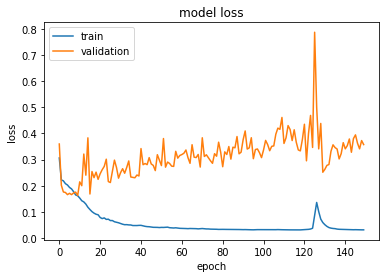

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
def customeloss(yTrue,yPred):
    return K.sum(-((yTrue*K.log(K.sigmoid(yPred)+epsilon))+(1-yTrue)*K.log(1-K.sigmoid(yPred)+epsilon)))/716
from matplotlib import pyplot as plt
from keras.models import load_model
model = load_model("testmodel.h5",custom_objects={'customeloss': customeloss})
model1 = load_model("testmodel1.h5",custom_objects={'customeloss': customeloss})
#model2 = load_model("testmodel2.h5",custom_objects={'customeloss': customeloss,'leakyRelu':LR})

OSError: ignored

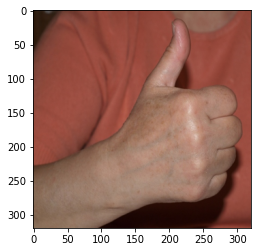

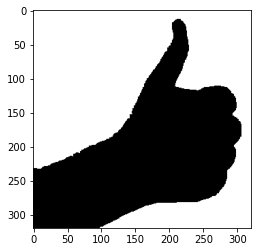

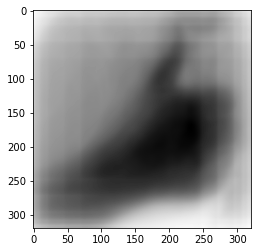

In [ ]:
#img = Image.open('1_P_hgr1_id01_1.jpg')
#groundtruth = Image.open('1_P_hgr1_id01_1.bmp')
#img = Image.open('1_P_hgr1_id01_3.jpg')#test colorful background
#groundtruth = Image.open('1_P_hgr1_id01_3.bmp')
#img = Image.open('1_P_hgr1_id02_1.jpg')#test black backgournd
#groundtruth = Image.open('1_P_hgr1_id02_1.bmp')
img = Image.open('1_P_hgr1_id04_1.jpg')#train
groundtruth = Image.open('1_P_hgr1_id04_1.bmp')
img = img.resize((320, 320))
plt.imshow(img)
plt.show()
groundtruth = groundtruth.resize((320, 320))
plt.imshow(groundtruth)
plt.show()
x_train1=[]
arr = np.array(img)
x_train1 = np.append(x_train1, arr)
x_train1 = np.array(x_train1, dtype='float32')
x_train1 = x_train1.reshape((1, 320, 320, 3))
x_train1 /= 255
#img=x_train[0]
#pred_array = model.predict(x_train1[:1])
#pred_array=pred_array[0].reshape(320,320)
#plt.imshow(pred_array,cmap='gray')
#plt.show()
pred_array = model1.predict(x_train1[:1])
pred_array=pred_array[0].reshape(320,320)
plt.imshow(pred_array,cmap='gray')
plt.show()
#pred_array = model2.predict(x_train1[:1])
#pred_array=pred_array[0].reshape(320,320)
#plt.imshow(pred_array,cmap='gray')
#plt.show()


DisabledFunctionError: ignored